In [2]:
# SETUP E  IMPORTS

#data manipulation
import pandas as pd
import numpy as np

#visualization
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# DATA IMPORT
data = pd.read_csv('/home/usuario-leticia/Desktop/Samuel/leticiaag/tcore/data/processed-data/raw-data-long-1-1k-ua.csv')

In [4]:
# filtro 0 km
data = data[data['kilometer'] != 0]

In [5]:
data['kilometer'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

## Statistical Describe

In [6]:
data.head()

,trial_number,respons_examiner,participant_number,sex,age,vo2máx,core_temp,kilometer,skin_temp,heart_rate,speed,wbgt,dry_temp,wet_temp,relative_humidity,umidade_absoluta
1,1,Rúbio,V1,Male,23,63.3,37.25,1,34.96,168,9.70,29.80,32.7,28.55,74.0,25.964951
2,1,Rúbio,V1,Male,23,63.3,37.75,2,35.15,178,10.32,30.00,32.8,28.80,74.0,26.103222
3,1,Rúbio,V1,Male,23,63.3,38.23,3,35.13,180,10.17,29.86,32.9,28.55,71.0,25.178255
4,1,Rúbio,V1,Male,23,63.3,38.70,4,35.19,187,10.20,29.71,33.0,28.30,68.0,24.242609
5,1,Rúbio,V1,Male,23,63.3,39.14,5,35.46,190,10.20,29.78,33.0,28.40,69.5,24.777373


In [7]:
describe_data = data.describe()
describe_data.loc[['mean', 'std', 'max']].round(3)

,trial_number,age,vo2máx,core_temp,kilometer,skin_temp,heart_rate,speed,wbgt,dry_temp,wet_temp,relative_humidity,umidade_absoluta
mean,38.000,31.213,56.171,38.346,5.500,34.676,164.660,11.425,28.706,33.046,26.845,61.841,22.095
std,21.663,7.496,7.209,0.956,2.874,1.174,16.107,1.856,1.509,0.252,2.158,11.586,4.117
max,75.000,50.000,70.100,40.750,10.000,37.710,199.000,17.310,31.620,34.000,30.900,83.000,30.064


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 750 entries, 1 to 824
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   trial_number        750 non-null    int64  
 1   respons_examiner    750 non-null    object 
 2   participant_number  750 non-null    object 
 3   sex                 750 non-null    object 
 4   age                 750 non-null    int64  
 5   vo2máx              750 non-null    float64
 6   core_temp           750 non-null    float64
 7   kilometer           750 non-null    int64  
 8   skin_temp           750 non-null    float64
 9   heart_rate          750 non-null    int64  
 10  speed               750 non-null    float64
 11  wbgt                750 non-null    float64
 12  dry_temp            750 non-null    float64
 13  wet_temp            750 non-null    float64
 14  relative_humidity   750 non-null    float64
 15  umidade_absoluta    750 non-null    float64
dtypes: float64(9)

In [9]:
data.isnull().sum()

trial_number          0
respons_examiner      0
participant_number    0
sex                   0
age                   0
vo2máx                0
core_temp             0
kilometer             0
skin_temp             0
heart_rate            0
speed                 0
wbgt                  0
dry_temp              0
wet_temp              0
relative_humidity     0
umidade_absoluta      0
dtype: int64

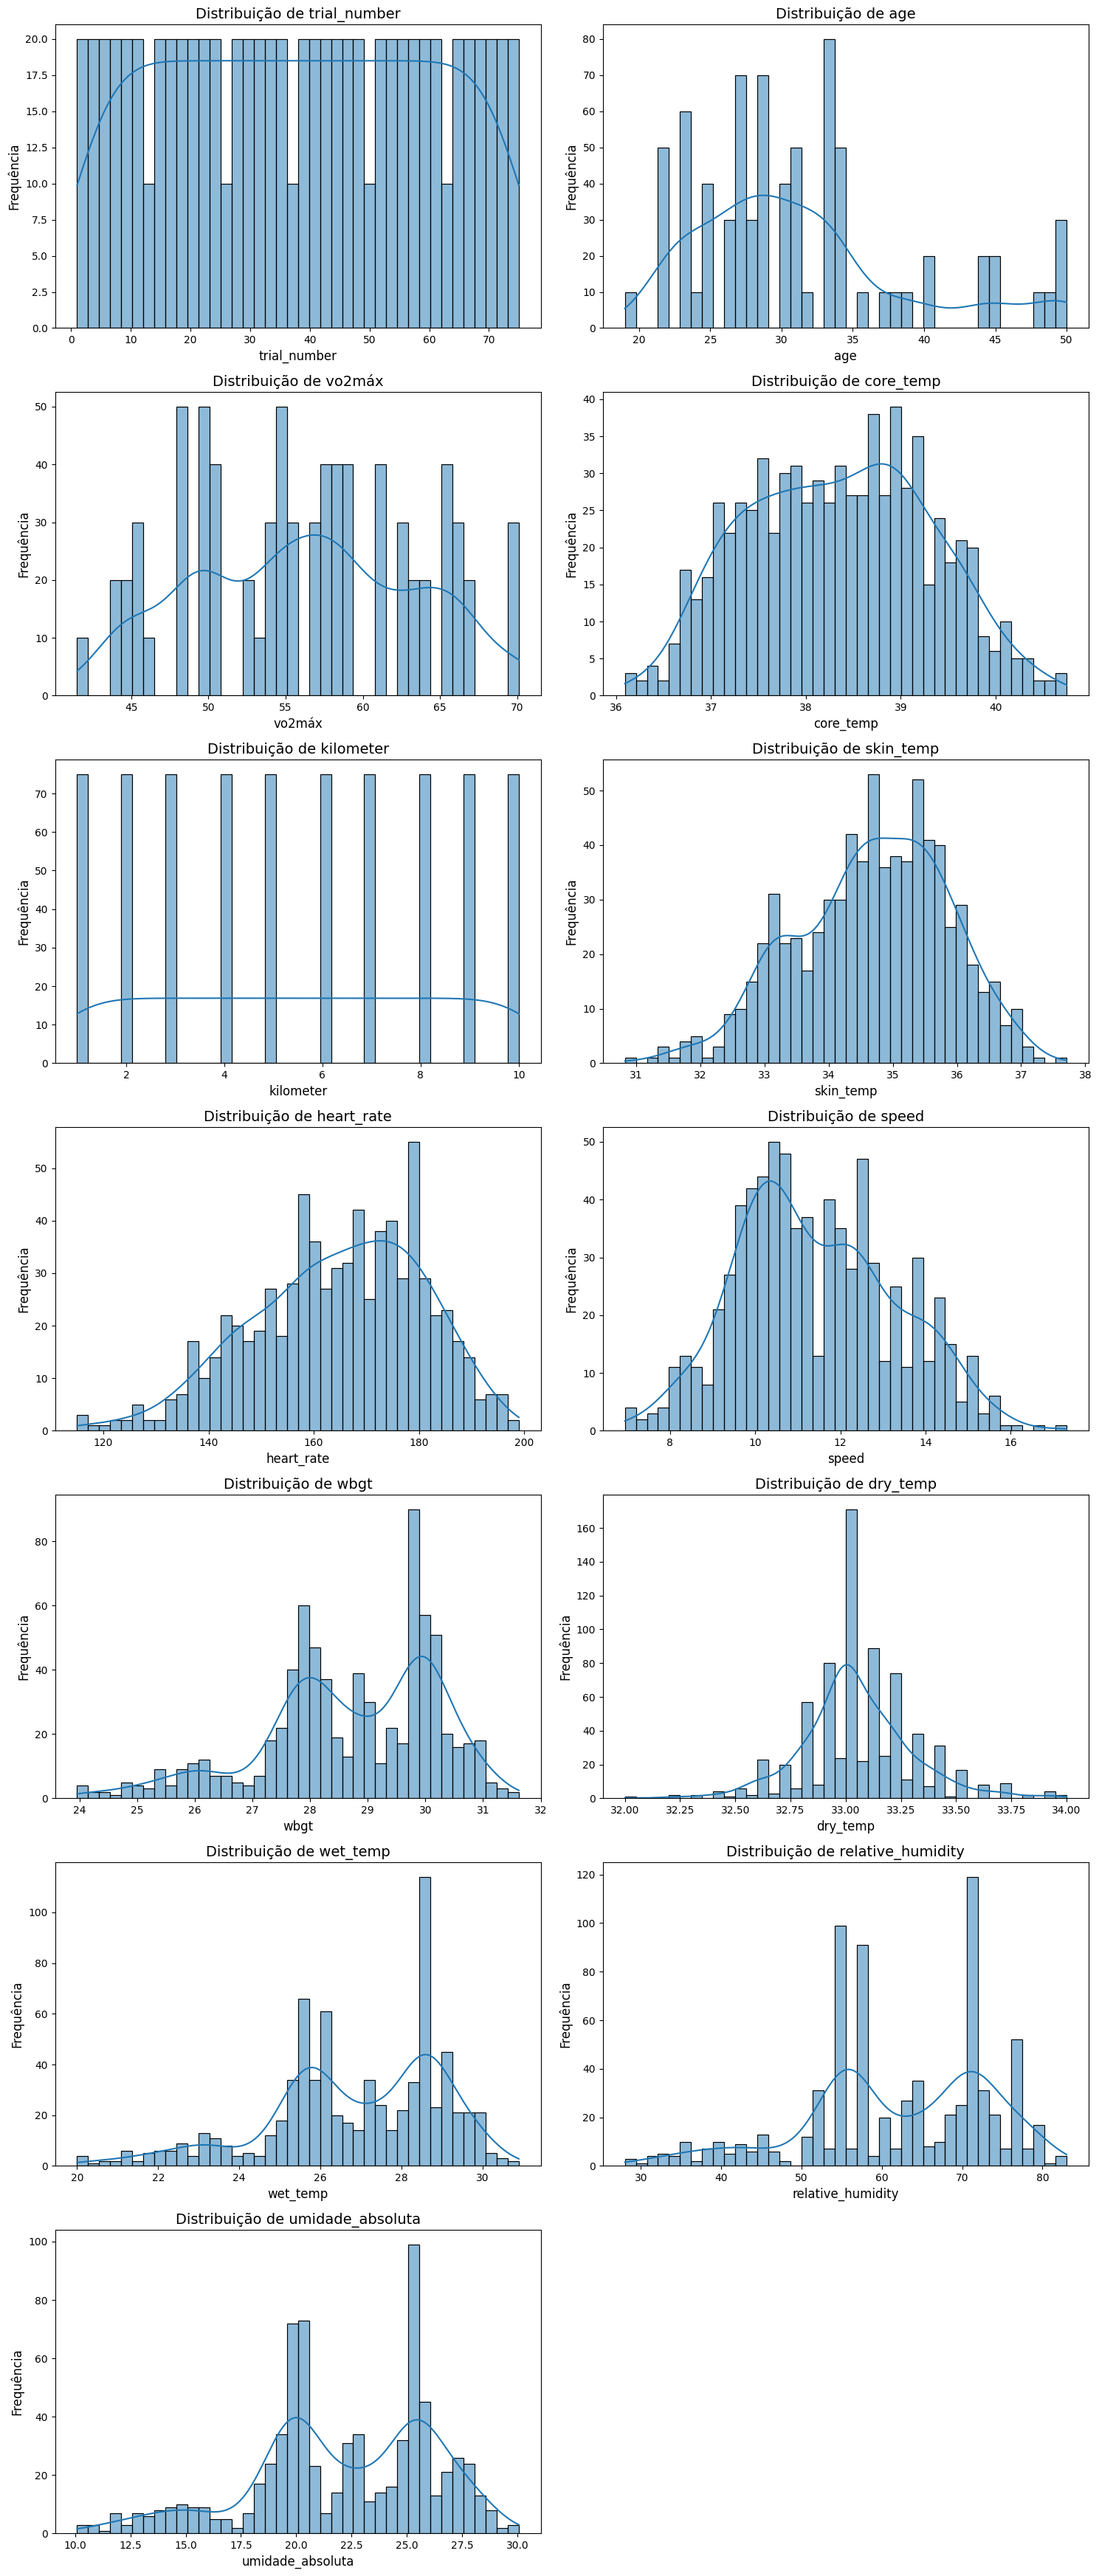

In [10]:
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
num_plots = len(numeric_cols)
num_cols = 2
num_rows = int(np.ceil(num_plots/num_cols))
fig, axes = plt.subplots(nrows=num_rows, ncols= num_cols, figsize=(15, 5*num_rows))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.histplot(data[col], kde = True, bins=40, ax=axes[i])
    axes[i].set_title(f'Distribuição de {col}', fontsize=14)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('Frequência', fontsize=12)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()


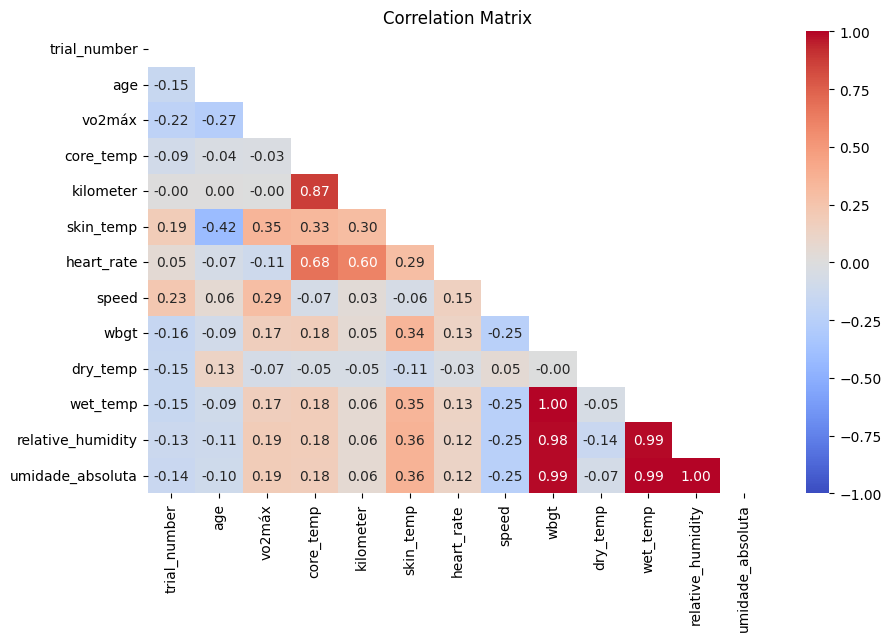

In [11]:
#correlation matrix
df_corr = data[data.select_dtypes(include=['float64', 'int64']).columns]
correlation_matrix = df_corr.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm',vmin=-1, vmax=1, mask=np.triu(np.ones_like(correlation_matrix, dtype=bool)))
plt.title('Correlation Matrix')
plt.show()

In [12]:
import scipy.stats as stats

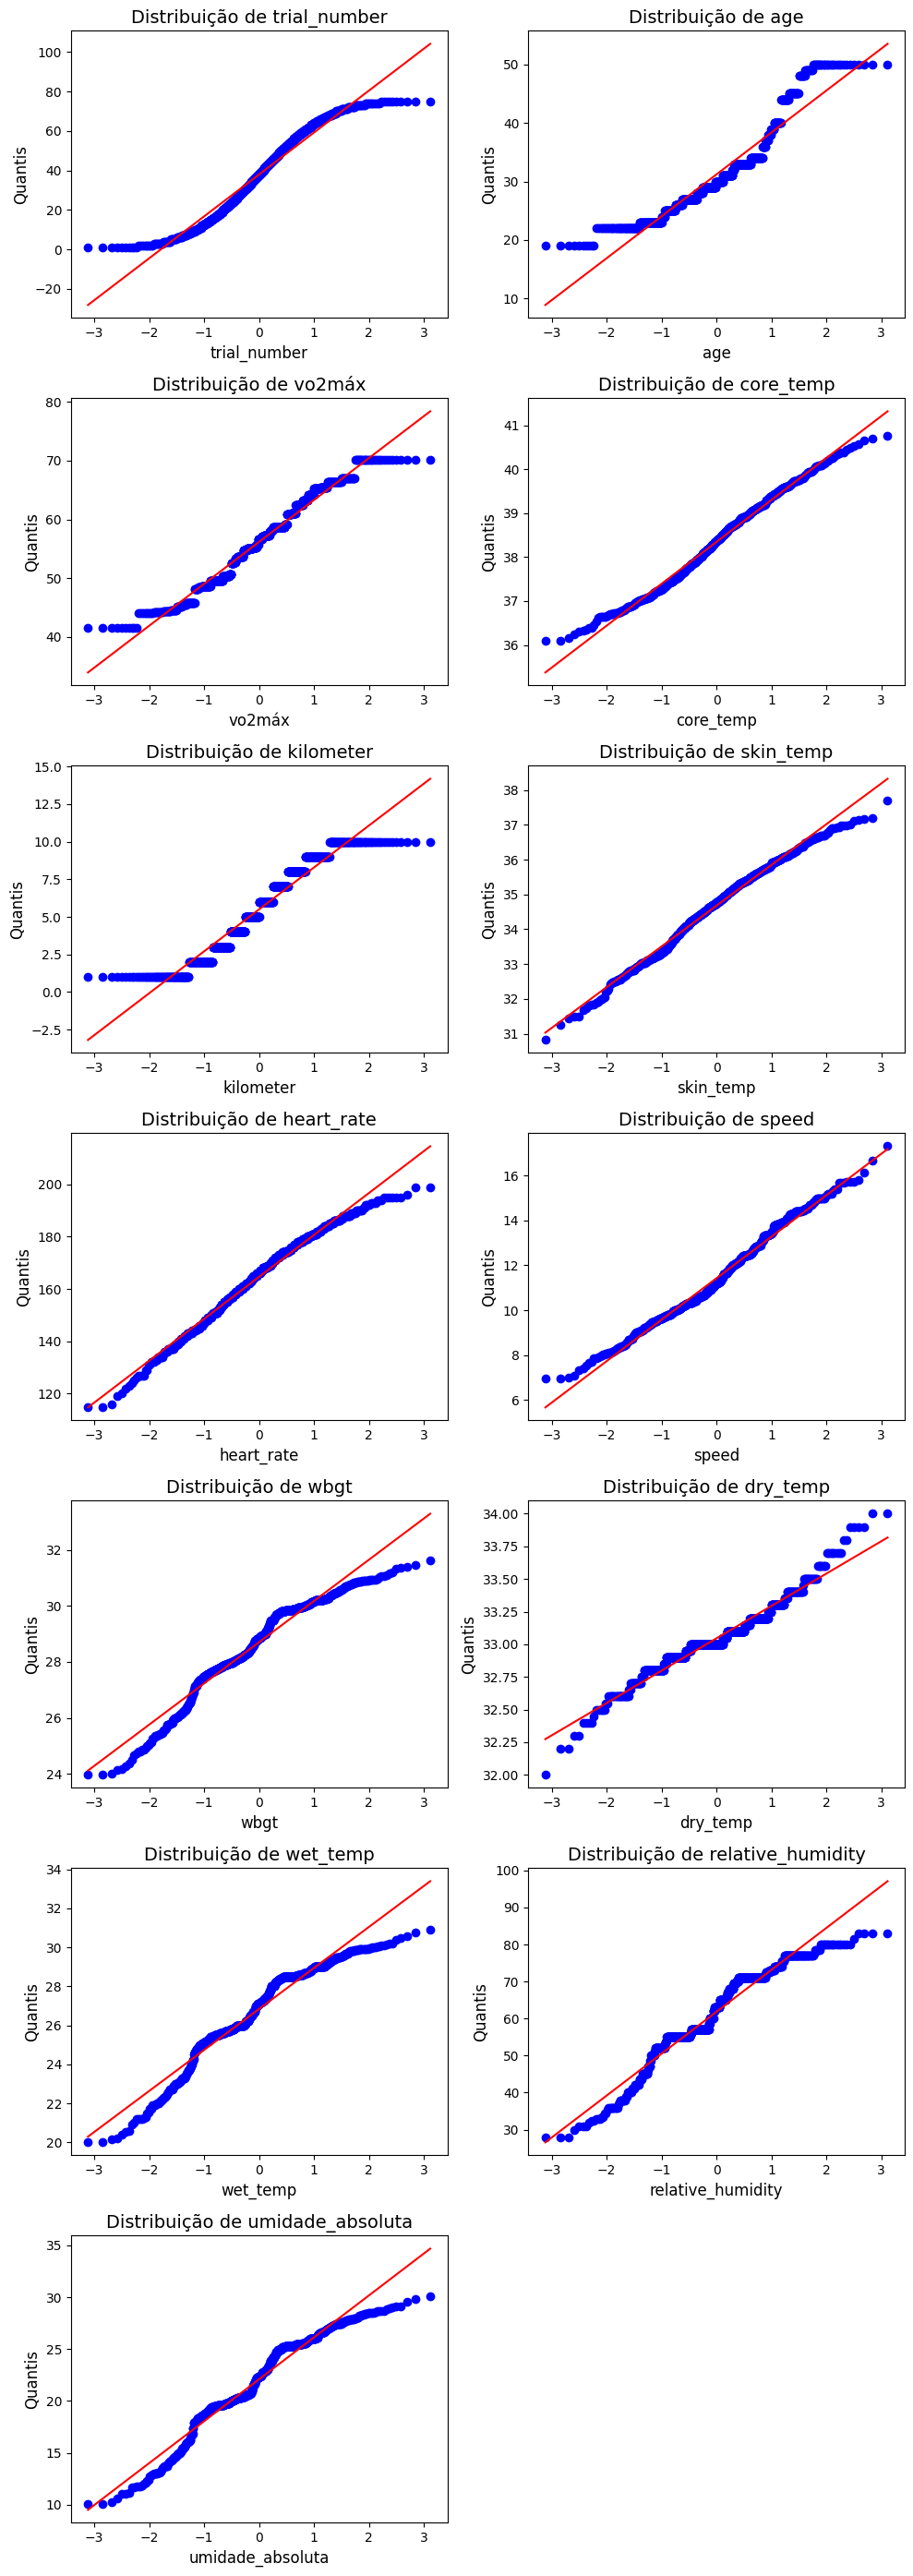

In [13]:
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
num_plots = len(numeric_cols)
num_cols = 2
num_rows = int(np.ceil(num_plots/num_cols))
fig, axes = plt.subplots(nrows=num_rows, ncols= num_cols, figsize=(10, 4*num_rows))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    stats.probplot(data[col].dropna(), dist="norm", plot=axes[i])  # Plota no eixo correto
    axes[i].set_title(f'Distribuição de {col}', fontsize=14)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('Quantis', fontsize=12)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()

In [16]:
# teste de normalidade de Shapiro-Wilk
normality_results = {}
for col in numeric_cols:
    stat, p_value = stats.shapiro(data[col].dropna())
    normality_results[col] = {'Statistic': stat, 'p-value': p_value}    

normality_df = pd.DataFrame(normality_results).T
normality_df['Normal Distribution'] = normality_df['p-value'] > 0.05
normality_df = normality_df.round(6)
print(normality_df)

                   Statistic   p-value  Normal Distribution
trial_number        0.954300  0.000000                False
age                 0.906608  0.000000                False
vo2máx              0.973544  0.000000                False
core_temp           0.988535  0.000013                False
kilometer           0.935225  0.000000                False
skin_temp           0.989008  0.000021                False
heart_rate          0.983851  0.000000                False
speed               0.987068  0.000003                False
wbgt                0.949348  0.000000                False
dry_temp            0.964133  0.000000                False
wet_temp            0.944706  0.000000                False
relative_humidity   0.948637  0.000000                False
umidade_absoluta    0.956026  0.000000                False


## Data series test

In [73]:
from statsmodels.stats.stattools import durbin_watson

In [115]:
# fc test
fc_teste = data['heart_rate'] 
dw_statistic = durbin_watson(fc_teste)
print(f'Durbin-Watson statistic: {dw_statistic}')
if 1.5 < dw_statistic < 2.5:
    print("No autocorrelation detected.")
elif dw_statistic <= 1.5:
    print("Positive autocorrelation detected.")
else:
    print("Negative autocorrelation detected.")


Durbin-Watson statistic: 0.007169316907734434
Positive autocorrelation detected.


In [116]:
#core test
core_teste = data['core_temp'] - data['core_temp'].mean()
dw_statistic = durbin_watson(core_teste)
print(f'Durbin-Watson statistic: {dw_statistic}')
if 1.5 < dw_statistic < 2.5:
    print("No autocorrelation detected.")
elif dw_statistic <= 1.5:
    print("Positive autocorrelation detected.")
else:
    print("Negative autocorrelation detected.")

Durbin-Watson statistic: 0.8418741717591782
Positive autocorrelation detected.


In [117]:
fc_teste = data['heart_rate'] - data['heart_rate'].mean()
fc_teste.head()

1     3.34
2    13.34
3    15.34
4    22.34
5    25.34
Name: heart_rate, dtype: float64

<Axes: xlabel='heart_rate', ylabel='heart_rate'>

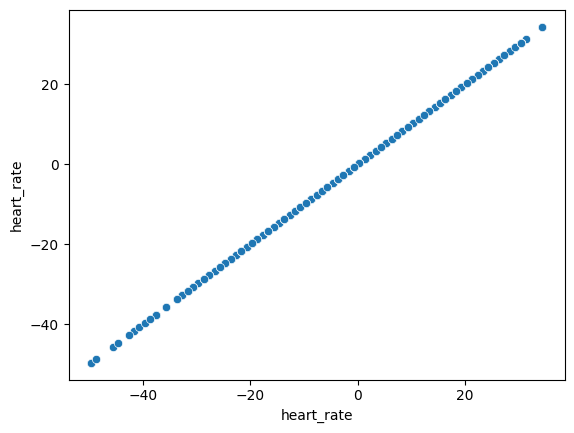

In [118]:
sns.scatterplot(x=fc_teste[:-1], y=fc_teste[1:], data=data)

<Axes: xlabel='core_temp', ylabel='core_temp'>

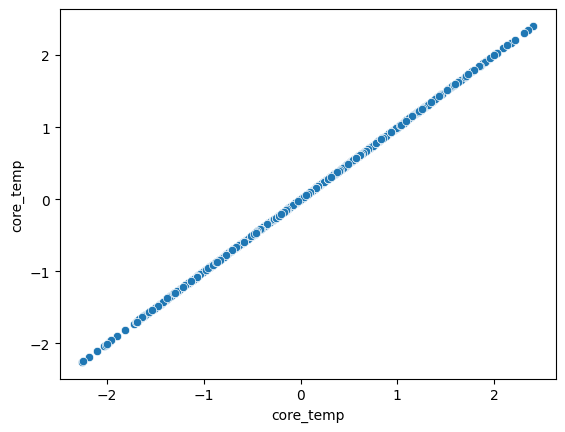

In [119]:
sns.scatterplot(x=core_teste[:-1], y=core_teste[1:], data=data)